## ML- Insurance Prediction 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
data = pd.read_csv("TRAIN.csv")
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0


In [4]:
data.shape

(304887, 12)

## Data Cleaning

In [7]:
data.isnull().sum()  # to check any missing value

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Present , no missing information in our train data

In [9]:
data.info()    # full information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    304887 non-null  int64 
 1   Gender                304887 non-null  object
 2   Age                   304887 non-null  int64 
 3   Driving_License       304887 non-null  int64 
 4   Region_Code           304887 non-null  int64 
 5   Previously_Insured    304887 non-null  int64 
 6   Vehicle_Age           304887 non-null  object
 7   Vehicle_Damage        304887 non-null  object
 8   Annual_Premium        304887 non-null  int64 
 9   Policy_Sales_Channel  304887 non-null  int64 
 10  Vintage               304887 non-null  int64 
 11  Response              304887 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 27.9+ MB


If any missing information present in the data, then we can apply fillna, dropna, replace

data.fillna()

data.dropna()

data.replace()

## Exploratory Data Analysis ( EDA )

In [10]:
data.columns


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
data['Gender'].value_counts()

Male      164823
Female    140064
Name: Gender, dtype: int64

In [13]:
data.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

In [15]:
data['Driving_License'].value_counts()

1    304239
0       648
Name: Driving_License, dtype: int64

In [16]:
data['Vehicle_Age'].value_counts()

1-2 Year     160244
< 1 Year     131823
> 2 Years     12820
Name: Vehicle_Age, dtype: int64

In [17]:
data['Vehicle_Damage'].value_counts()

Yes    153897
No     150990
Name: Vehicle_Damage, dtype: int64

In [18]:
data['Age'].min()

20

In [19]:
data['Age'].max()

85

In [20]:
data[data['Age'] == data['Age'].min()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
52,353878,Female,20,1,32,1,< 1 Year,No,2630,160,38,0
89,306471,Male,20,1,17,0,< 1 Year,Yes,32966,160,247,0
130,119866,Male,20,1,33,1,< 1 Year,No,2630,157,245,0
231,140901,Female,20,1,6,0,< 1 Year,Yes,26879,160,51,0
299,117734,Male,20,1,8,0,< 1 Year,Yes,34430,160,201,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304591,63240,Female,20,1,30,0,< 1 Year,Yes,25232,160,121,0
304642,202406,Male,20,1,35,1,< 1 Year,Yes,2630,160,152,0
304766,218242,Male,20,1,36,1,< 1 Year,No,42958,160,35,0
304864,259902,Male,20,1,15,0,1-2 Year,Yes,22723,124,95,0


In [21]:
data[data['Age'] == data['Age'].max()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
11135,137704,Female,85,1,28,0,1-2 Year,Yes,51045,124,147,0
28930,48876,Female,85,1,45,1,1-2 Year,No,2630,26,102,0
98876,100684,Female,85,1,28,0,1-2 Year,Yes,32366,26,293,0
191212,208265,Female,85,1,8,0,1-2 Year,Yes,65268,124,245,0
199923,321082,Female,85,1,8,1,1-2 Year,No,41080,7,129,0
217526,213100,Female,85,1,28,0,1-2 Year,Yes,2630,26,290,0
251676,229104,Female,85,0,28,1,1-2 Year,No,27057,26,65,0
269736,210250,Female,85,1,28,1,1-2 Year,No,42530,26,64,0


In [23]:
data[(data['Age'] >= 20) & (data['Age'] <= 30)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0
8,345343,Male,23,1,16,1,< 1 Year,No,32018,152,134,0
13,79548,Male,22,1,6,1,< 1 Year,Yes,39064,152,70,0
15,376034,Female,25,1,35,1,< 1 Year,No,28359,152,45,0
16,75322,Female,24,1,46,1,< 1 Year,No,24415,152,223,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304879,226261,Female,28,1,16,1,< 1 Year,No,20595,152,175,0
304880,330777,Female,20,1,12,0,< 1 Year,Yes,44804,160,279,0
304881,36279,Female,23,1,41,1,< 1 Year,No,37708,152,126,0
304883,162796,Male,24,1,50,1,< 1 Year,No,34455,152,68,0


### Seaborn disribution plot

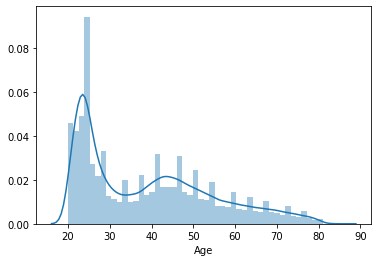

In [32]:
sns.distplot(data['Age'])  

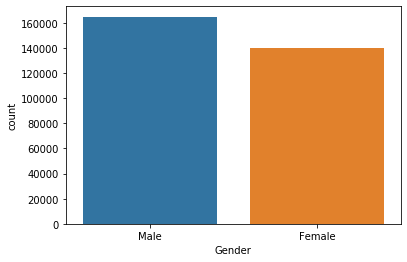

In [29]:
sns.countplot(x=data['Gender'])  # category fields